In [ ]:
!pip3 install torch
!pip3 install scipy

!pip3 install timm==0.4.5
!pip3 install opencv-python==4.7.0.72
!pip3 install tensorboard==2.11.2
!pip3 install termcolor==2.3.0
!pip3 install yacs==0.1.8
!pip3 install -U openmim
!mim install mmcv==2.0.0

In [2]:
CONFIG_PATH = "./configs/MetaFG_meta_0_224_inference.yaml"
MODEL_PATH_BSL = "./output/MetaFG_meta_0/MetaFormer_0-iNat2018-Balanced_Softmax_Loss/ckpt_epoch_140.pth"
MODEL_PATH_SL = "./output/MetaFG_meta_0/MetaFormer_0-iNat2018-Softmax_Loss/ckpt_epoch_133.pth"
CLASS_NAMES = "./datasets/inaturalist2018/categories.json"

In [3]:
from inference import Inference

MetaFG_BSL = Inference(config_path=CONFIG_PATH, model_path=MODEL_PATH_BSL, class_names=CLASS_NAMES)
MetaFG_SL = Inference(config_path=CONFIG_PATH, model_path=MODEL_PATH_SL, class_names=CLASS_NAMES)

Using cpu device.
-= Merging config from: './configs/MetaFG_meta_0_224_inference.yaml' =-


c:\Users\Admin\miniconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


<All keys matched successfully>
Finished constructing model.
Using cpu device.
-= Merging config from: './configs/MetaFG_meta_0_224_inference.yaml' =-
<All keys matched successfully>
Finished constructing model.


In [12]:
import matplotlib.pyplot as plt
from PIL import Image

IMG_PATH = "images\PXL_20221112_043327580.jpg"
LOCATION = (35.950000, 139.653111)

[Using MetaFormerBSL (Meta)]
Prediksi Spesies:
 1. Ixora coccinea          : 19.68% [ID: 6979]
 2. Catopsilia pomona       : 10.49% [ID: 1626]
 3. Asclepias purpurascens  :  1.94% [ID: 6903]
 4. Centranthus ruber       :  1.19% [ID: 6534]
 5. Vespa velutina          :  1.09% [ID: 592]

[Using MetaFormerBSL (No Meta)]
Prediksi Spesies:
 1. Ixora coccinea          : 34.43% [ID: 6979]
 2. Catopsilia pomona       :  5.57% [ID: 1626]
 3. Asclepias purpurascens  :  3.58% [ID: 6903]
 4. Centranthus ruber       :  1.43% [ID: 6534]
 5. Hydrangea macrophylla   :  0.65% [ID: 6501]

[Using MetaFormer (Meta)]
Prediksi Spesies:
 1. Ixora coccinea          :  6.80% [ID: 6979]
 2. Asclepias purpurascens  :  6.60% [ID: 6903]
 3. Asclepias incarnata     :  3.40% [ID: 6897]
 4. Centranthus ruber       :  3.03% [ID: 6534]
 5. Catopsilia pomona       :  2.97% [ID: 1626]

[Using MetaFormer (No Meta)]
Prediksi Spesies:
 1. Asclepias purpurascens  : 13.42% [ID: 6903]
 2. Ixora coccinea          : 11.17% [ID: 

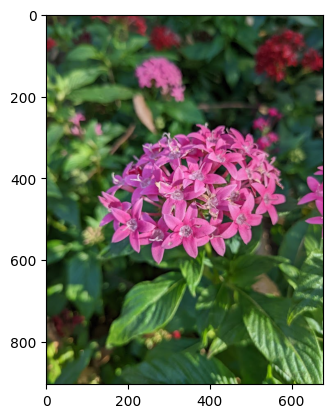

In [13]:
print("[Using MetaFormerBSL (Meta)]")
conf_meta_BSL, pred_id_meta_BSL, pred_class_meta_BSL = MetaFG_BSL.predict(img_path=IMG_PATH, location=LOCATION, use_meta=True, show_top_5=True)
print("\n[Using MetaFormerBSL (No Meta)]")
conf_BSL, pred_id_BSL, pred_class_BSL = MetaFG_BSL.predict(img_path=IMG_PATH, location=LOCATION, use_meta=False, show_top_5=True)
print("\n[Using MetaFormer (Meta)]")
conf_meta_SL, pred_id_meta_SL, pred_class_meta_SL = MetaFG_SL.predict(img_path=IMG_PATH, location=LOCATION, use_meta=True, show_top_5=True)
print("\n[Using MetaFormer (No Meta)]")
conf_SL, pred_id_SL, pred_class_SL = MetaFG_SL.predict(img_path=IMG_PATH, location=LOCATION, use_meta=False, show_top_5=True)

image = Image.open(IMG_PATH).convert('RGB')
plt.figure()
plt.imshow(image)